_This code is written by Malik Serikbolsyn for the sole purpose of research._

_Thanks KBTU Business School dean's office for providing the Refinitiv WorkSpace facility which, in turn,
was used for data extraction in here._

In [6]:
!pip install eikon

In [2]:
import pandas as pd
import eikon as ek

ek.set_app_key('96cfb5ebfce04035a78784ad3c9421e9c189afa8')

RICs = ['.KASE','KZTO.KZ']

start_date = '2018-01-02'

df = ek.get_timeseries(RICs, 'CLOSE', interval='monthly', start_date=start_date)

In [8]:
df

CLOSE,.KASE,KZTO.KZ
Date,,
2018-01-31,2329.23,1477.93
2018-02-28,2362.21,1590.0
2018-03-31,2437.05,1552.16
2018-04-30,2436.66,1564.99
2018-05-31,2503.22,1537.99
...,...,...
2022-11-30,3064.93,563.89
2022-12-31,3251.64,734.0
2023-01-31,3299.91,710.0


---

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

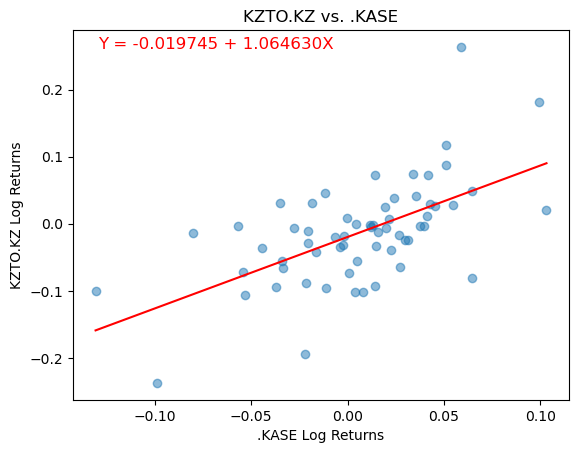

In [11]:
# Calculate the logarithmic returns
log_returns = np.log(df / df.shift(1))

# Drop any NaN values
log_returns = log_returns.dropna()

# Convert the columns to float dtype
log_returns = log_returns.astype(float)

# Convert log_returns data to NumPy arrays
x_data = log_returns[RICs[0]].values
y_data = log_returns[RICs[1]].values

# Calculate the beta using linear regression (numpy.polyfit)
slope, intercept = np.polyfit(x_data, y_data, deg=1)

# Create the scatterplot
plt.scatter(x_data, y_data, alpha=0.5)

# Add the regression line
x = np.linspace(x_data.min(), x_data.max(), 100)
y = intercept + slope * x
plt.plot(x, y, color='r')

# Customize the plot
plt.title('KZTO.KZ vs. .KASE')
plt.xlabel(RICs[0] + ' Log Returns')
plt.ylabel(RICs[1] + ' Log Returns')
plt.annotate(f'Y = {intercept:.6f} + {slope:.6f}X', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red')

# Display the plot
plt.show()

In [65]:
# Calculate the total sum of squares
tss = np.sum((y_data - y_data.mean()) ** 2)

# Calculate the R-squared value
r_squared = 1 - (sse / tss)

print(f"R-squared: {r_squared:.6f}")

R-squared: 0.353217


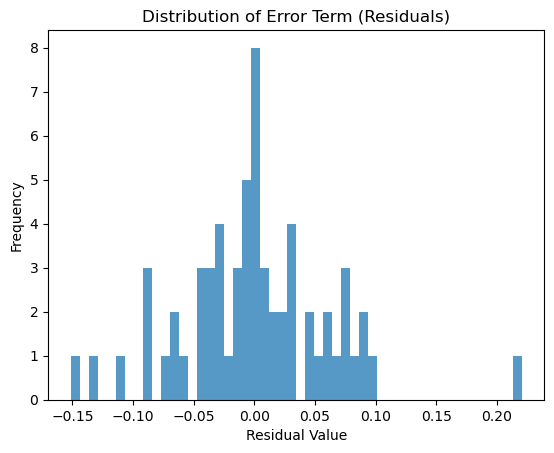

In [12]:
# Calculate the residuals (error term)
residuals = y_data - (intercept + slope * x_data)

# Plot the distribution of the residuals
plt.figure()
plt.hist(residuals, bins=50, alpha=0.75)
plt.title('Distribution of Error Term (Residuals)')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')

# Display the plot
plt.show()
